In [1]:
import numpy as np

a = np.arange(0,10)
b = np.arange(0,5,dtype=np.uint32)
c = np.arange(3,8)
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [2]:
print(b)
print(c)

[0 1 2 3 4]
[3 4 5 6 7]


In [4]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
decoder  = Model(input_img,decoded)


In [5]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


In [7]:
from keras.utils import plot_model
plot_model(decoder, to_file='model_dec.png')

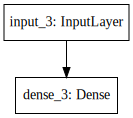

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(decoder).create(prog='dot', format='svg'))
SVG(model_to_dot(encoder).create(prog='dot', format='svg'))

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

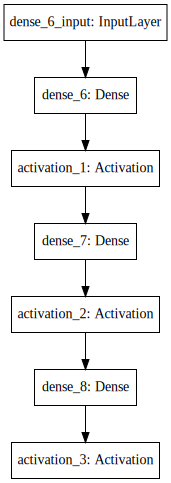

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('elu'),
    Dense(32),
    Activation('softmax'),
])
SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Train model